In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ipo_scoop.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], skiprows=2, names=['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price', 'first_day_close', 'first_day_pctchg', 'dollar_change_open', 'dollar_change_close', 'star_rating', 'performed'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null object
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: object(12)
memory usage: 294.6+ KB


In [4]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,$4.00,$4.40,$6.18,54.50%,$0.40,$2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,$4.00,$5.51,$5.56,39.00%,$1.51,$1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,$4.00,$5.20,$4.62,15.50%,$1.20,$0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,$5.00,$5.00,$4.38,-12.40%,$0.00,-$0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,$5.00,$5.55,$4.88,-2.40%,$0.55,-$0.12,1,NaN


In [5]:
df = df.applymap(lambda x: x if not '$' in str(x) else x.replace('$', ''))

In [6]:
df = df.applymap(lambda x: x if not '%' in str(x) else x.replace('%', ''))

In [7]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed
0,2/16/18,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,54.50,0.40,2.18,N/C,NaN
1,3/16/18,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,39.00,1.51,1.56,1,Missed
2,3/20/18,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,15.50,1.20,0.62,N/C,NaN
3,2/14/18,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-12.40,0.00,-0.62,1,NaN
4,2/1/18,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-2.40,0.55,-0.12,1,NaN


In [8]:
df.loc[1258, 'date'] = '2012-11-20'

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null object
open_price             3123 non-null object
first_day_close        3123 non-null object
first_day_pctchg       3123 non-null object
dollar_change_open     3123 non-null object
dollar_change_close    3123 non-null object
star_rating            3123 non-null object
performed              357 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 294.6+ KB


In [11]:
df['offer_price'] = df['offer_price'].astype('float')

In [12]:
df['open_price'] = df['open_price'].astype('float')
df['first_day_close'] = df['first_day_close'].astype('float')

In [13]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed'],
      dtype='object')

In [14]:
df.replace('N/C', 0, inplace=True)

In [15]:
for col in df.columns[4:11]:
    df[col] = df[col].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 12 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 294.6+ KB


### Opening Day Change

In [17]:
df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

date
2000.0    35.562278
2001.0    12.761489
2002.0     7.247073
2003.0    11.945000
2004.0    10.703276
2005.0     9.910752
2006.0     9.988270
2007.0    11.521406
2008.0     2.318085
2009.0     7.175738
2010.0     8.654875
2011.0     9.044406
2012.0    11.981918
2013.0    16.352652
2014.0    12.363160
2015.0    13.947341
2016.0    10.979623
2017.0    10.537348
2018.0    14.417569
Name: first_day_pctchg, dtype: float64

In [18]:
mean_year_first = df.groupby(df.date.dt.year)['first_day_pctchg'].mean()

In [23]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.45
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.91
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.15
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.40
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.07


In [21]:
df['dollar_chg_opencls'] = (df['dollar_change_close'] - df['dollar_change_open'])

In [22]:
df['pct_chg_opencls'] = ((df['dollar_chg_opencls']/df['open_price']))

In [24]:
df.pct_chg_opencls.describe()

count    3123.000000
mean        1.347326
std        11.031064
min       -98.520000
25%        -2.870000
50%         0.000000
75%         4.000000
max       159.420000
Name: pct_chg_opencls, dtype: float64

In [25]:
df[df.pct_chg_opencls < -98]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
2218,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1.0,NaN,-6.0,-98.52


### The above was one of Jacob's cells.  After seeing one stock that had a very high negative change between open and close, he did some EDA to see what was going on.  It became clear that one of the features calculated by S&P (or whoever) was populated improperly, so Jacob put the correct value in. 

### After the EDA, I thought it made sense to recalculate the values for certain engineered features.  I then thought it made sense to look at all of the features pre-calculated by the data provider to see if they made sense.  Since I expect only a few errors and I'm not putting this model into production (and I'm lazy), I'm only going to check "dollar_change_open," but for the final project I would check all of them.

In [26]:
df.loc[2218, 'dollar_change_open'] = 0.09

In [27]:
df['dollar_chg_opencls'] = (df['dollar_change_close'] - df['dollar_change_open'])

In [28]:
df['pct_chg_opencls'] = ((df['dollar_chg_opencls']/df['open_price']))

In [29]:
df.iloc[2218]

date                      2005-04-18 00:00:00
issuer                 Terra Nova Acquisition
symbol                                  TNVAU
managers                    EarlyBird Capital
offer_price                                 6
open_price                               6.09
first_day_close                          6.22
first_day_pctchg                         3.67
dollar_change_open                       0.09
dollar_change_close                      0.22
star_rating                                 1
performed                                 NaN
dollar_chg_opencls                       0.13
pct_chg_opencls                          2.13
Name: 2218, dtype: object

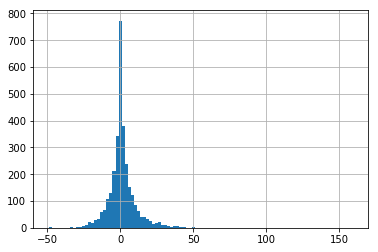

In [30]:
df.pct_chg_opencls.hist(bins= 100)

In [31]:
df[df.pct_chg_opencls < -33]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
892,2013-01-15,"USA Compression Partners, LP",USAC,"Barclays Capital/ Goldman, Sachs/ J.P. Morgan/...",18.00,17.50,11.66,-35.22,-0.50,-6.34,1.0,NaN,-5.84,-33.37
1364,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3.0,NaN,-24.23,-40.38
1454,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1.0,NaN,-10.97,-49.28
2577,2004-10-27,eLong,LONG,Deutsche Bank Securities,13.50,22.00,14.40,6.67,8.50,0.90,3.0,NaN,-7.60,-34.55
3015,2000-08-09,Repeater Technologies,RPTR,US Bancorp Piper Jaffray,9.00,17.00,8.75,-2.78,8.00,-0.25,4.0,NaN,-8.25,-48.53


### This is where I check dollar_change_open.  I tried simple boolean indexing and got really strange results.  I'm guessing this is due to how Python stores/displays floats and does calculations with them. Rounding the values should take care of this issue.

In [100]:
df[abs(df.dollar_change_open).round(2) != abs((df.open_price-df.offer_price)).round(2)]

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,...,pct_chg_opencls,sp_close_chg,sp_open_chg,sp_high_chg,sp_low_chg,sp_vol_chg,lead_mgr,lead_mgr_counts,gap_open_pct,open_to_close_pct
3123,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3124,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3125,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3126,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3127,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3128,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3129,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3130,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3131,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN
3132,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,19,NaN,NaN


###  Most of the errors above seem to simply reflect rounding errors of 1 cent.  However, there appear to be a few genuine errors.  Since the offer price and opening price reflect actual market data, I'm going to assume that they're more likely to be correct.  As such, I'm going to recalculate/repopulate the pre-calculated engineered features and those depending on them.

In [33]:
df.dollar_change_open = (df.open_price-df.offer_price).round(2)
df.dollar_change_close = (df.first_day_close-df.offer_price).round(2)

In [34]:
df.first_day_pctchg = (df.first_day_close-df.offer_price)/df.offer_price
df['pct_chg_opencls'] = ((df['dollar_chg_opencls']/df['open_price'])).round(2)
df['dollar_chg_opencls'] = (df['dollar_change_close'] - df['dollar_change_open']).round(2)

In [35]:
df.head(7)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,0.545,0.40,2.18,0.0,NaN,1.78,0.40
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,0.390,1.51,1.56,1.0,Missed,0.05,0.01
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,0.155,1.20,0.62,0.0,NaN,-0.58,-0.11
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-0.124,0.00,-0.62,1.0,NaN,-0.62,-0.12
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-0.024,0.55,-0.12,1.0,NaN,-0.67,-0.12
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.0,4.64,4.70,-0.060,-0.36,-0.30,1.0,NaN,0.06,0.01
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.0,5.55,5.10,0.020,0.55,0.10,1.0,NaN,-0.45,-0.08


### Feature Engineering



In [37]:
sp = pd.read_csv('SPY.csv')

In [38]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700


In [39]:
sp.sort_values('Date', inplace = True)
sp.reset_index(drop= True, inplace = True)

In [40]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700


In [41]:
sp['day_ago'] = sp.Date.shift(periods=1)
sp['week_ago'] = sp.Date.shift(periods = 7)

In [42]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN


In [47]:
sp['day_ago_close'] = sp.Close.shift(periods = 1)
sp['week_ago_close'] = sp.Close.shift(periods = 7)

### You'd engineered day/week ago close.  I also thought it made sense to do the same for the other columns (not adjusted close since it's almost always going to be identical to plain old regular close).

In [48]:
sp['day_ago_open'] = sp.Open.shift(periods = 1)
sp['week_ago_open'] = sp.Open.shift(periods = 7)

In [49]:
sp['day_ago_high'] = sp.High.shift(periods = 1)
sp['week_ago_high'] = sp.High.shift(periods = 7)

In [50]:
sp['day_ago_low'] = sp.Low.shift(periods = 1)
sp['week_ago_low'] = sp.Low.shift(periods = 7)

In [51]:
sp['day_ago_high'] = sp.High.shift(periods = 1)
sp['week_ago_high'] = sp.High.shift(periods = 7)

In [52]:
sp['day_ago_vol'] = sp.Volume.shift(periods = 1)
sp['week_ago_vol'] = sp.Volume.shift(periods = 7)

In [53]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_high,week_ago_high,day_ago_vol,week_ago_vol,day_ago_close,week_ago_close,day_ago_open,week_ago_open,day_ago_low,week_ago_low
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.799988,NaN,48201000.0,NaN,279.339996,NaN,279.640015,NaN,278.839996,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.910004,NaN,52315500.0,NaN,280.470001,NaN,278.470001,NaN,278.410004,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.179993,NaN,44593500.0,NaN,281.059998,NaN,280.559998,NaN,280.059998,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.739990,NaN,61412100.0,NaN,280.000000,NaN,280.309998,NaN,279.459991,NaN


In [54]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
Date              24 non-null object
Open              24 non-null float64
High              24 non-null float64
Low               24 non-null float64
Close             24 non-null float64
Adj Close         24 non-null float64
Volume            24 non-null int64
day_ago           23 non-null object
week_ago          17 non-null object
day_ago_high      23 non-null float64
week_ago_high     17 non-null float64
day_ago_vol       23 non-null float64
week_ago_vol      17 non-null float64
day_ago_close     23 non-null float64
week_ago_close    17 non-null float64
day_ago_open      23 non-null float64
week_ago_open     17 non-null float64
day_ago_low       23 non-null float64
week_ago_low      17 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 3.6+ KB


In [56]:
sp['close_chg'] = ((sp.day_ago_close - sp.week_ago_close)/sp.week_ago_close)
sp['open_chg'] = ((sp.day_ago_open - sp.week_ago_open)/sp.week_ago_open)
sp['high_chg'] = ((sp.day_ago_high - sp.week_ago_high)/sp.week_ago_high)
sp['low_chg'] = ((sp.day_ago_low - sp.week_ago_low)/sp.week_ago_low)
sp['vol_chg'] = ((sp.day_ago_vol - sp.week_ago_vol)/sp.week_ago_vol)

In [58]:
sp.describe()

,Open,High,Low,Close,Adj Close,Volume,day_ago_high,week_ago_high,day_ago_vol,week_ago_vol,...,week_ago_close,day_ago_open,week_ago_open,day_ago_low,week_ago_low,close_chg,open_chg,high_chg,low_chg,vol_chg
count,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,23.000000,17.000000,2.300000e+01,1.700000e+01,...,17.000000,23.000000,17.000000,23.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,282.066671,283.055416,281.271249,282.320417,282.320417,5.852580e+07,282.969130,282.439997,5.960131e+07,5.903712e+07,...,281.734118,282.008700,281.356474,281.179999,280.618234,0.004367,0.005249,0.004883,0.004509,0.095292
std,2.016000,1.893362,2.058840,1.968777,1.968777,1.701411e+07,1.887049,1.797444,1.654131e+07,1.293143e+07,...,1.879064,2.040753,1.860394,2.054891,1.852964,0.008822,0.008074,0.007832,0.009936,0.460121
min,278.470001,279.799988,278.410004,279.339996,279.339996,3.378911e+07,279.799988,279.799988,3.565240e+07,3.940090e+07,...,279.339996,278.470001,278.470001,278.410004,278.410004,-0.013306,-0.010547,-0.012132,-0.017810,-0.486758
25%,280.497498,281.562500,279.489998,280.762489,280.762489,4.440562e+07,281.434998,280.910004,4.582055e+07,4.820100e+07,...,280.200012,280.434998,279.769989,279.479995,279.359985,-0.002600,-0.000816,-0.001522,-0.001983,-0.225841
50%,282.085007,283.119996,280.505005,281.940002,281.940002,5.592745e+07,282.579987,282.130005,5.791950e+07,5.791950e+07,...,281.329987,281.790009,281.329987,280.380005,280.130005,0.004033,0.006219,0.005237,0.004730,0.112716
75%,283.455009,284.220009,282.632507,283.927498,283.927498,6.816280e+07,284.165008,283.820007,6.829870e+07,6.802690e+07,...,283.339996,283.460006,282.529999,282.419998,281.279999,0.011442,0.012129,0.010971,0.010819,0.298833
max,285.529999,286.010010,285.239990,285.579987,285.579987,1.028272e+08,286.010010,286.010010,1.028272e+08,8.233770e+07,...,285.579987,285.529999,285.390015,285.239990,285.239990,0.020111,0.016310,0.015336,0.021048,1.380447


In [45]:
sp.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day_ago,week_ago,day_ago_close,week_ago_close,chg
0,2018-07-16,279.640015,279.799988,278.839996,279.339996,279.339996,48201000,NaN,NaN,NaN,NaN,NaN
1,2018-07-17,278.470001,280.910004,278.410004,280.470001,280.470001,52315500,2018-07-16,NaN,279.339996,NaN,NaN
2,2018-07-18,280.559998,281.179993,280.059998,281.059998,281.059998,44593500,2018-07-17,NaN,280.470001,NaN,NaN
3,2018-07-19,280.309998,280.739990,279.459991,280.000000,280.000000,61412100,2018-07-18,NaN,281.059998,NaN,NaN
4,2018-07-20,279.769989,280.480011,279.500000,279.679993,279.679993,82337700,2018-07-19,NaN,280.000000,NaN,NaN
5,2018-07-23,279.450012,280.429993,279.059998,280.200012,280.200012,47047600,2018-07-20,NaN,279.679993,NaN,NaN
6,2018-07-24,281.790009,282.559998,280.630005,281.609985,281.609985,68026900,2018-07-23,NaN,280.200012,NaN,NaN
7,2018-07-25,281.329987,284.369995,281.279999,284.010010,284.010010,78882900,2018-07-24,2018-07-16,281.609985,279.339996,0.812626
8,2018-07-26,283.200012,284.109985,283.089996,283.339996,283.339996,57919500,2018-07-25,2018-07-17,284.010010,280.470001,1.262170
9,2018-07-27,283.709991,283.820007,280.380005,281.420013,281.420013,76768700,2018-07-26,2018-07-18,283.339996,281.059998,0.811214


In [59]:
df['sp_close_chg'] = sp.close_chg
df['sp_open_chg'] = sp.open_chg
df['sp_high_chg'] = sp.high_chg
df['sp_low_chg'] = sp.low_chg
df['sp_vol_chg'] = sp.vol_chg

In [60]:
df.head(10)

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_chg,sp_open_chg,sp_high_chg,sp_low_chg,sp_vol_chg
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.00,4.40,6.18,0.545000,0.40,2.18,0.0,NaN,1.78,0.40,NaN,NaN,NaN,NaN,NaN
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.00,5.51,5.56,0.390000,1.51,1.56,1.0,Missed,0.05,0.01,NaN,NaN,NaN,NaN,NaN
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.00,5.20,4.62,0.155000,1.20,0.62,0.0,NaN,-0.58,-0.11,NaN,NaN,NaN,NaN,NaN
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.00,5.00,4.38,-0.124000,0.00,-0.62,1.0,NaN,-0.62,-0.12,NaN,NaN,NaN,NaN,NaN
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.00,5.55,4.88,-0.024000,0.55,-0.12,1.0,NaN,-0.67,-0.12,NaN,NaN,NaN,NaN,NaN
5,2018-03-29,Genprex,GNPX,Network 1 Financial Securities,5.00,4.64,4.70,-0.060000,-0.36,-0.30,1.0,NaN,0.06,0.01,NaN,NaN,NaN,NaN,NaN
6,2018-06-27,HyreCar,HYRE,Network 1 Financial Securities,5.00,5.55,5.10,0.020000,0.55,0.10,1.0,NaN,-0.45,-0.08,NaN,NaN,NaN,NaN,NaN
7,2018-07-27,Adial Pharmaceuticals,ADIL,Joseph Gunnar & Co.,5.00,4.00,4.05,-0.190000,-1.00,-0.95,1.0,NaN,0.05,0.01,0.008126,0.007688,0.009864,0.006419,0.411317
8,2018-05-24,CLPS Incorporation,CLPS,Benchmark/ Cuttone,5.25,5.75,5.51,0.049524,0.50,0.26,0.0,NaN,-0.24,-0.04,0.012622,0.010270,0.012317,0.010309,0.507830
9,2018-06-28,Entera Bio Ltd.,ENTX,Maxim Group,8.00,7.30,6.28,-0.215000,-0.70,-1.72,0.0,NaN,-1.02,-0.14,0.008112,0.009410,0.010420,0.010819,0.298833


In [61]:
df.managers[:10]

0              ViewTrade Securities
1              ViewTrade Securities
2              ViewTrade Securities
3        Piper Jaffray/ Oppenheimer
4             Roth Capital Partners
5    Network 1 Financial Securities
6    Network 1 Financial Securities
7               Joseph Gunnar & Co.
8                Benchmark/ Cuttone
9                      Maxim Group 
Name: managers, dtype: object

In [62]:
df['lead_mgr'] = df['managers'].astype('str').map(lambda x:x.split('/')[0])

In [63]:
df['lead_mgr'].head()

0     ViewTrade Securities
1     ViewTrade Securities
2     ViewTrade Securities
3            Piper Jaffray
4    Roth Capital Partners
Name: lead_mgr, dtype: object

In [64]:
df.loc[df['lead_mgr'].str.contains('ViewTrade'), 'lead_mgr'] = 'viewtrade securities'

In [66]:
df.lead_mgr.unique()[:5]

array(['viewtrade securities', 'Piper Jaffray', 'Roth Capital Partners',
       'Network 1 Financial Securities', 'Joseph Gunnar & Co.'], dtype=object)

### After executing the above cell yesterday, I decided to see if there were duplicate entries for certain lead managers.  There were, and I painstakingly went through, figuring out regex patterns so that I could correct all of the faulty data.

### I then had to choose how to best feed the lead_mgr column into a model.  Dummying would create hundreds of new columns, most of which would be populated almost entirely with zeros.  Instead, what I'd did was I created a "lead manager count" column by grouping the data frame by lead manager, grabbing the count of that manager, and placing the count for each row in a new column.  I followed the example given here:  https://stackoverflow.com/questions/17709270/i-want-to-create-a-column-of-value-counts-in-my-pandas-dataframe

### That gave me a column with a count of the number of times a given lead manager appeared in the dataset.  Below is just a teeny example of what I did--I went through each and ever manager and wrote a line of code for each one.

### Unfortunately, after doing this, I saved my work and decided to reboot my work PC before pushing the changes to my github repo.  After doing this, the folder containing _all_ my work on my work PC just simply disappeared, and my sysadmin team told me there's no way to recover.  Since this isn't a production model, I wanted you to know the steps I took, but I'm not planning on doing them again for most of the managers.

In [90]:
df[df['lead_mgr'].str.contains('Stanl')]['lead_mgr'].unique()

array(['Morgan Stanley', 'Morgan Stanle', '  Morgan Stanley',
       'Morgan Stanley, Goldman, Sachs', 'Morgan Stanley.Deutsche Bank',
       'Morgan Stanly', 'Morgan Stanley Dean Witter',
       'Morgan Stanley Dean Witter & China Intl.'], dtype=object)

In [91]:
df.loc[df['lead_mgr'].str.contains('Stanl'), 'lead_mgr'] = 'Morgan Stanley'
# I did this for the entire set of lead managers before losing all of my work

In [93]:
df['lead_mgr_counts'] = df.groupby(['lead_mgr'])['lead_mgr'].transform('count')
# This is the column i was interested in creating.  It should contain the same information that I would get by dummying
# all of the lead_mgr values.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 21 columns):
date                   3123 non-null datetime64[ns]
issuer                 3123 non-null object
symbol                 3123 non-null object
managers               3123 non-null object
offer_price            3123 non-null float64
open_price             3123 non-null float64
first_day_close        3123 non-null float64
first_day_pctchg       3123 non-null float64
dollar_change_open     3123 non-null float64
dollar_change_close    3123 non-null float64
star_rating            3123 non-null float64
performed              357 non-null object
dollar_chg_opencls     3123 non-null float64
pct_chg_opencls        3123 non-null float64
sp_close_chg           17 non-null float64
sp_open_chg            17 non-null float64
sp_high_chg            17 non-null float64
sp_low_chg             17 non-null float64
sp_vol_chg             17 non-null float64
lead_mgr               3142 non-null object
le

In [98]:
df['gap_open_pct'] = (df['dollar_change_open']/df['open_price'])
df['open_to_close_pct'] = (df['dollar_change_close']- df['dollar_change_open'])/df['open_price']

In [99]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,...,pct_chg_opencls,sp_close_chg,sp_open_chg,sp_high_chg,sp_low_chg,sp_vol_chg,lead_mgr,lead_mgr_counts,gap_open_pct,open_to_close_pct
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,0.545,0.40,2.18,...,0.40,NaN,NaN,NaN,NaN,NaN,viewtrade securities,6,0.090909,0.404545
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,0.390,1.51,1.56,...,0.01,NaN,NaN,NaN,NaN,NaN,viewtrade securities,6,0.274047,0.009074
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,0.155,1.20,0.62,...,-0.11,NaN,NaN,NaN,NaN,NaN,viewtrade securities,6,0.230769,-0.111538
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-0.124,0.00,-0.62,...,-0.12,NaN,NaN,NaN,NaN,NaN,Piper Jaffray,44,0.000000,-0.124000
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-0.024,0.55,-0.12,...,-0.12,NaN,NaN,NaN,NaN,NaN,Roth Capital Partners,18,0.099099,-0.120721


In [59]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr', 'gap_open_pct',
       'open_to_close_pct'],
      dtype='object')

In [60]:
df['month'] = df.date.dt.month

In [61]:
df.month[:5]

0    2.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: month, dtype: float64

In [62]:
df['day'] = df.date.dt.dayofweek

In [63]:
df['day'][:5]

0    4.0
1    4.0
2    1.0
3    2.0
4    3.0
Name: day, dtype: float64

In [64]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,NaN,viewtrade securities,9.090909,40.454545,2.0,4.0
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,NaN,viewtrade securities,27.404719,0.907441,3.0,4.0
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN,viewtrade securities,23.076923,-11.153846,3.0,1.0
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN,Piper Jaffray,0.000000,-12.400000,2.0,2.0
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN,Roth Capital Partners,9.909910,-12.072072,2.0,3.0


In [65]:
df['day'] = df.day.map({1: 'mon', 2: 'tues', 3: 'weds', 4:'thurs', 5:'fri'   })

In [66]:
df['month'] = df.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})

In [97]:
df.head()

,date,issuer,symbol,managers,offer_price,open_price,first_day_close,first_day_pctchg,dollar_change_open,dollar_change_close,star_rating,performed,dollar_chg_opencls,pct_chg_opencls,sp_close_open_chg_pct,lead_mgr,gap_open_pct,open_to_close_pct,month,day
0,2018-02-16,Farmmi,FAMI,ViewTrade Securities,4.0,4.40,6.18,54.5,0.40,2.18,0.0,NaN,1.78,40.454545,NaN,viewtrade securities,9.090909,40.454545,feb,thurs
1,2018-03-16,Senmiao Technology,AIHS,ViewTrade Securities,4.0,5.51,5.56,39.0,1.51,1.56,1.0,Missed,0.05,0.907441,NaN,viewtrade securities,27.404719,0.907441,mar,thurs
2,2018-03-20,Golden Bull,DNJR,ViewTrade Securities,4.0,5.20,4.62,15.5,1.20,0.62,0.0,NaN,-0.58,-11.153846,NaN,viewtrade securities,23.076923,-11.153846,mar,mon
3,2018-02-14,Motus GI Holdings,MOTS,Piper Jaffray/ Oppenheimer,5.0,5.00,4.38,-12.4,0.00,-0.62,1.0,NaN,-0.62,-12.400000,NaN,Piper Jaffray,0.000000,-12.400000,feb,tues
4,2018-02-01,One Stop Systems,OSS,Roth Capital Partners,5.0,5.55,4.88,-2.4,0.55,-0.12,1.0,NaN,-0.67,-12.072072,NaN,Roth Capital Partners,9.909910,-12.072072,feb,weds


### Feature Selection

In [98]:
df.columns

Index(['date', 'issuer', 'symbol', 'managers', 'offer_price', 'open_price',
       'first_day_close', 'first_day_pctchg', 'dollar_change_open',
       'dollar_change_close', 'star_rating', 'performed', 'dollar_chg_opencls',
       'pct_chg_opencls', 'sp_close_open_chg_pct', 'lead_mgr', 'gap_open_pct',
       'open_to_close_pct', 'month', 'day'],
      dtype='object')

In [99]:
X = pd.get_dummies(df[['month', 'day', 'gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price', 'dollar_chg_opencls']], drop_first = True)

In [100]:
X.head(10)

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
0,9.090909,0.40,4.00,4.40,1.78,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,27.404719,1.51,4.00,5.51,0.05,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,23.076923,1.20,4.00,5.20,-0.58,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.000000,0.00,5.00,5.00,-0.62,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,9.909910,0.55,5.00,5.55,-0.67,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,-7.758621,-0.36,5.00,4.64,0.06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,9.909910,0.55,5.00,5.55,-0.45,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,-25.000000,-1.00,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.50,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.70,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [101]:
X.shape

(3142, 20)

In [102]:
X = X[7:]

In [103]:
X.shape

(3135, 20)

In [104]:
X.head()

,gap_open_pct,dollar_change_open,offer_price,open_price,dollar_chg_opencls,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept,day_mon,day_thurs,day_tues,day_weds
7,-25.000000,-1.0,5.00,4.00,0.05,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,8.695652,0.5,5.25,5.75,-0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,-9.589041,-0.7,8.00,7.30,-1.02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10,5.555556,0.5,8.50,9.00,-0.20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,13.461538,1.4,9.00,10.40,-0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [105]:
X.isnull().sum()

gap_open_pct          19
dollar_change_open    19
offer_price           19
open_price            19
dollar_chg_opencls    19
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sept             0
day_mon                0
day_thurs              0
day_tues               0
day_weds               0
dtype: int64

In [106]:
X.dropna().shape

(3116, 20)

In [107]:
X = X.dropna()

In [108]:
X.columns

Index(['gap_open_pct', 'dollar_change_open', 'offer_price', 'open_price',
       'dollar_chg_opencls', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'day_mon', 'day_thurs',
       'day_tues', 'day_weds'],
      dtype='object')

### Binary Classification

In [109]:
y = X.dollar_chg_opencls
X = X.drop('dollar_chg_opencls', axis = 1)

X_train, X_test = X[:2800], X[2800:]

In [110]:
X_test.shape

(316, 19)

In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 2807 to 3122
Data columns (total 19 columns):
gap_open_pct          316 non-null float64
dollar_change_open    316 non-null float64
offer_price           316 non-null float64
open_price            316 non-null float64
month_aug             316 non-null uint8
month_dec             316 non-null uint8
month_feb             316 non-null uint8
month_jan             316 non-null uint8
month_jul             316 non-null uint8
month_jun             316 non-null uint8
month_mar             316 non-null uint8
month_may             316 non-null uint8
month_nov             316 non-null uint8
month_oct             316 non-null uint8
month_sept            316 non-null uint8
day_mon               316 non-null uint8
day_thurs             316 non-null uint8
day_tues              316 non-null uint8
day_weds              316 non-null uint8
dtypes: float64(4), uint8(15)
memory usage: 17.0 KB


In [112]:
y[:10]

7     0.05
8    -0.24
9    -1.02
10   -0.20
11   -0.73
12    0.00
13   -0.07
14    0.00
15    0.00
16    0.06
Name: dollar_chg_opencls, dtype: float64

In [113]:
y = y.map(lambda x: 1 if x > 1 else 0)

In [114]:
y_train = y[:2800]
y_test = y[2800:]

In [115]:
y_test.shape

(316,)

In [116]:
y_train[:10]

7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: dollar_chg_opencls, dtype: int64

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
clf.score(X_test, y_test)

0.6962025316455697